In [5]:
# Libraries

import geemap, ee # Import geemap and earth engine together
import matplotlib.pyplot as plt

print("Libraries imported")

# Authenticate Google Earth Engine and initialize project

ee.Authenticate() # Authenticate Google Earth Engine account
ee.Initialize(project="geog-581-483717") # Initialize GEOG 581 project

print("Authenticated and initialized")

Libraries imported
Authenticated and initialized


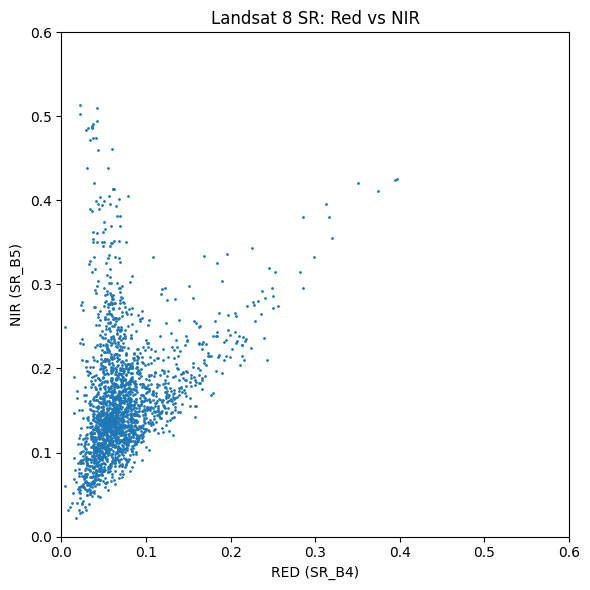

In [6]:
# Load dataset
L8_SR = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')

# Included OSU Campus geometry from previous part
region = {'coordinates': [[-123.2896, 44.556878], [-123.289746, 44.567887], [-123.280012, 44.567978], [-123.279983, 44.569073], [-123.264052, 44.565212], [-123.266664, 44.560189], [-123.267731, 44.56048], [-123.275811, 44.559618], [-123.276983, 44.559333], [-123.278133, 44.558733], [-123.280385, 44.557569], [-123.281612, 44.557172], [-123.282858, 44.556918], [-123.284478, 44.556836], [-123.289491, 44.556865]]}
coords = region["coordinates"]
if coords[0] != coords[-1]:
    coords = coords + [coords[0]]
region_geom = ee.Geometry.Polygon([coords])

# Scaling function to normalize Surface Reflectance values
def apply_scale_factors(image):
  optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermal_bands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
  return image.addBands(optical_bands, None, True).addBands(
      thermal_bands, None, True
  )

# Apply scaling function
L8SR_scaled = L8_SR.map(apply_scale_factors)

# Collect images
image = ee.Image(
    L8SR_scaled.filterBounds(region_geom)
         .filterDate("2020-12-01", "2020-12-16")
         .first()
)

# Initialize map container
Map = geemap.Map(ee_initialize=False)

# Visualize false color image
Map.addLayer(image, {"bands": ['SR_B5','SR_B4','SR_B3'], "min":0, "max":4000}, 'image')

# Set-up reducer
scale = 30
values = image.reduceRegion(ee.Reducer.toList(), region_geom, scale)

# Set-up scatter plot
x = values.get("SR_B4").getInfo()
y = values.get("SR_B5").getInfo()

# Generate scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=1)
plt.xlabel("RED (SR_B4)")
plt.ylabel("NIR (SR_B5)")
plt.xlim(0, 0.6)
plt.ylim(0, 0.6)
plt.title("Landsat 8 SR: Red vs NIR")
plt.tight_layout()
plt.show()


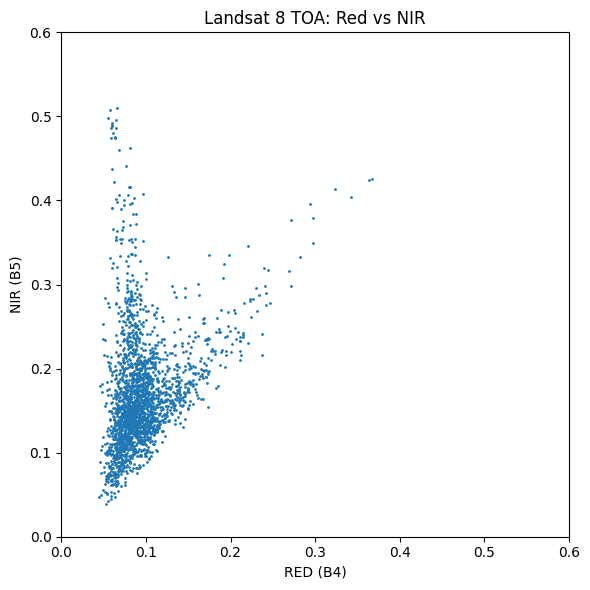

In [7]:
# Load dataset
L8_TOA = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')

# Collect images
image_toa = ee.Image(
    L8_TOA.filterBounds(region_geom)
         .filterDate("2020-12-01", "2020-12-16")
         .first()
)

# Initialize map container
toa_Map = geemap.Map(ee_initialize=False)

# Visualize false color image
toa_Map.addLayer(image_toa, {"bands": ['B5','B4','B3'], "min":0, "max":4000}, 'image')

# Set-up reducer
scale = 30
values = image_toa.reduceRegion(ee.Reducer.toList(), region_geom, scale)

# Set-up scatter plot
x = values.get("B4").getInfo()
y = values.get("B5").getInfo()

# Generate scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=1)
plt.xlabel("RED (B4)")
plt.ylabel("NIR (B5)")
plt.xlim(0, 0.6)
plt.ylim(0, 0.6)
plt.title("Landsat 8 TOA: Red vs NIR")
plt.tight_layout()
plt.show()
